# Resistance Measurements of 2nd Batch of Sponge-Wedge Chips

## Summary Graphs

### Data
Electrical resistances from a total of n=3 sections of chips processed with Protocol 1 were measured. 

Figures from this notebook are in a summary slide deck named `2024-07-07_clearance_2nd_batch_v3.pptx`.

In [33]:
data_csv_filename = '2nd_batch_resistances_py.xlsx'

In [34]:
def _get_src_dir() -> str:
    return os.path.split(os.path.dirname(os.path.abspath('__file__')))[0]

In [35]:
import os
os.chdir(_get_src_dir())
from src.utility import _Utility
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [36]:
data_path = os.path.join(_Utility.get_user_data_dir_path(), data_csv_filename)

In [37]:
print(data_path)

/home/mkrause/data/biofuel-cell/2nd_batch_resistances_py.xlsx


#### Read all sheets of the Excel file

In [38]:
xlsx = pd.read_excel(data_path, sheet_name=None)
print(xlsx.keys())

dict_keys(['protocol01_positive_control', 'protocol01_negative_control', 'protocol02_positive_control', 'protocol02_negative_control', 'protocol03_positive_control', 'protocol03_negative_control'])


Add a 'Sheet' column to each dataframe. This is necessary because the sheet names are not a column in the Excel file.

In [39]:
for sheet_name in xlsx.keys():
    xlsx[sheet_name]['Sheet'] = sheet_name

Concatenate sheets of positive controls into one DataFrame

In [40]:
df = pd.concat(xlsx[frame] for frame in xlsx.keys() if 'positive' in frame)

In [41]:
df

,R_avg [Ohm],R_stdev [Ohm],fraction of R_stdev,chip_id,Sheet
0,3190,0.128,0.000040,1,protocol01_positive_control
1,42900000,73100.000,0.001704,1,protocol01_positive_control
2,3920,3.000,0.000765,1,protocol01_positive_control
3,40370000,172000.000,0.004261,1,protocol01_positive_control
4,95400000,700000.000,0.007338,1,protocol01_positive_control
5,3530,10.500,0.002975,1,protocol01_positive_control
6,4040,24.700,0.006114,1,protocol01_positive_control
7,3000,11.000,0.003667,1,protocol01_positive_control
8,4150,56.000,0.013494,1,protocol01_positive_control
0,5400,51.000,0.009444,2,protocol02_positive_control


## Plot all data

### Plot each average of a 100 samples with its corresponding standard deviation.

In [42]:
x_label = 'Chip Section Index'
y_label1 = 'Average resistance of 100 observations ($\Omega$)'
y_label2 = 'Resistance ($\Omega$)'

In [43]:
def avg_with_stdev_for_each_channel():
    # Get the data and errors from the DataFrame.
    averages = df['R_avg [Ohm]']
    std_devs = df['R_stdev [Ohm]']

    # Create an array with the positions of each bar on the x-axis.
    x_pos = np.arange(len(averages))

    # 'chip_id' is the column with group ids.
    chip_ids: np.ndarray = df['chip_id'].unique()

    # Create a color dictionary for unique groups.
    colors: dict = {chip_id: plt.cm.rainbow(np.linspace(0, 1, len(chip_ids))[i]) for i, chip_id in enumerate(chip_ids)}

    # Create a bar plot with error bars by plotting each individual bar, one at a time.
    for i in range(len(df)):
        plt.bar(x_pos[i], averages.iloc[i], yerr=std_devs.iloc[i], align='center', alpha=0.7, ecolor='black', capsize=10,
               color=colors[df['chip_id'].iloc[i]])

    # Set the y-axis to be logarithmic.
    plt.yscale('log')

    # Customize the plot.
    plt.title('Average Values with Standard Deviation (total is n = 3 chips)')
    plt.ylabel(y_label1)
    plt.xlabel(x_label)
    plt.xticks(x_pos, df['chip_id'])
    plt.tight_layout()

    # Save figure to disk.
    filename = f'{_Utility.get_filename_only(filename=data_csv_filename)}.png'
    fig_filename = os.path.join(_Utility.get_user_data_dir_path(), filename)
    plt.savefig(fig_filename)

    # Display the plot.
    plt.show()

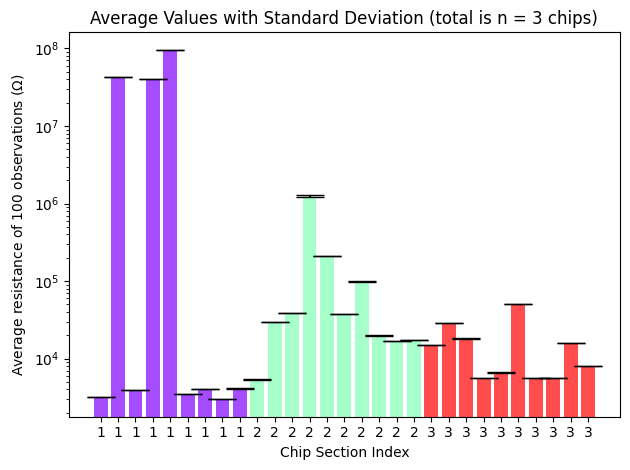

In [44]:
avg_with_stdev_for_each_channel()

### Create average of each chip
Create averages of the mean values for each microchannel measurement. That results in a mean of means. Then compute the standard error of that mean.

In [45]:
def avg_section():
    means = df.groupby('chip_id')['R_avg [Ohm]'].mean()
    stderr = df.groupby('chip_id')['R_avg [Ohm]'].apply(stats.sem)
    groups = means.index

    # Create a color dictionary for unique groups.
    colors: dict = {group: plt.cm.rainbow(np.linspace(0, 1, len(groups))[i]) for i, group in enumerate(groups)}

    # Create a bar plot.
    for i in range(len(groups)):
        plt.bar(i, means.iloc[i], yerr=stderr.iloc[i], color=colors[groups[i]], capsize=5)

    # Set x-ticks to the group names.
    plt.xticks(np.arange(len(groups)), groups)

    # Set the y-axis to be logarithmic.
    plt.yscale('log')

    # Customize the plot.
    plt.title('Per-chip Average w/ standard err. (total is n = 3 chips)')
    plt.ylabel(y_label2)
    plt.xlabel(x_label)
    plt.tight_layout()

    filename = f'{_Utility.get_filename_only(filename=data_csv_filename)}_per_chip.png'
    fig_filename = os.path.join(_Utility.get_user_data_dir_path(), filename)
    plt.savefig(fig_filename)

    # Display the plot.
    plt.show()

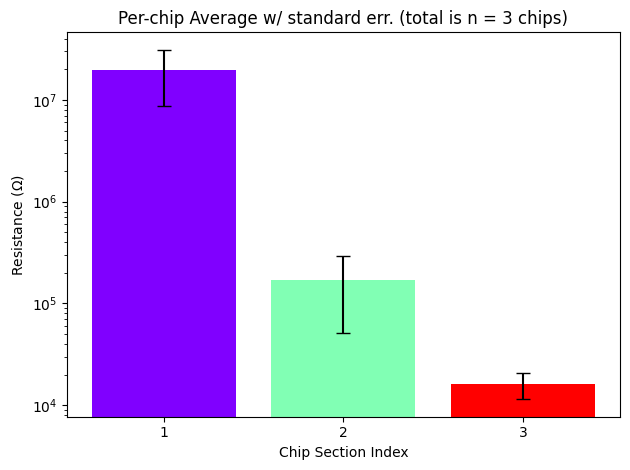

In [46]:
avg_section()

### Detecting (and removing) outliers

Check if any values are outliers, possibly because the channels the data originated from, were not conducting (something I didn't pay enough attention to when I did the measurement). See docstring of method on how outliers are defined.

In [47]:
df_without_outliers = df.groupby('chip_id')['R_avg [Ohm]'].apply(_Utility.remove_outliers, dataset_name='chip-section').reset_index()

Found 2 outliers in chip-section 2!
Found 1 outliers in chip-section 3!


In [48]:
def avg_section_no_outliers():
    means = df_without_outliers.groupby('chip_id')['R_avg [Ohm]'].mean()
    stderr = df_without_outliers.groupby('chip_id')['R_avg [Ohm]'].apply(stats.sem)
    groups = means.index
    
    # Create a color dictionary for unique groups.
    colors: dict = {group: plt.cm.rainbow(np.linspace(0, 1, len(groups))[i]) for i, group in enumerate(groups)}

    # Create a bar plot.
    for i in range(len(groups)):
        plt.bar(i, means.iloc[i], yerr=stderr.iloc[i], color=colors[groups[i]], capsize=5)

    # Set x-ticks to the group names.
    plt.xticks(np.arange(len(groups)), groups)

    # Set the y-axis to be logarithmic.
    plt.yscale('log')


    # Customize the plot.
    plt.title('Per-chip Average without outliers (total is n = 3 chips)')
    plt.ylabel(y_label2)
    plt.xlabel(x_label)
    plt.tight_layout()

    filename = f'{_Utility.get_filename_only(filename=data_csv_filename)}_per_chip_no_outliers.png'
    fig_filename = os.path.join(_Utility.get_user_data_dir_path(), filename)
    plt.savefig(fig_filename)

    # Display the plot.
    plt.show()

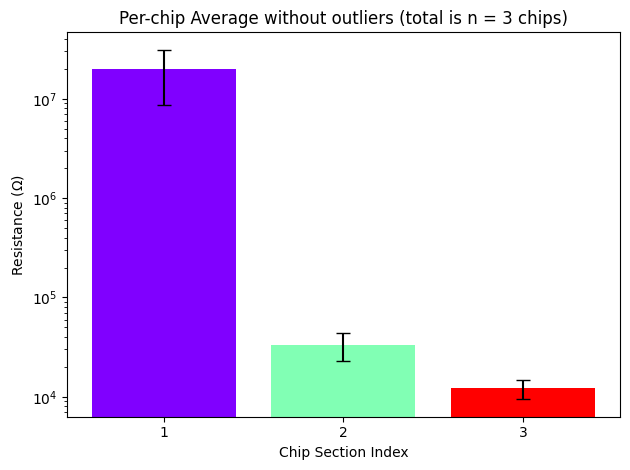

In [49]:
avg_section_no_outliers()

#### Get a few negative controls

In [50]:
df = pd.concat(xlsx[frame] for frame in xlsx.keys() if 'negative' in frame)
df.dropna(inplace=True)

In [51]:
df

,R_avg [Ohm],R_stdev [Ohm],fraction of R_stdev,Sheet
0,99000.0,233.0,0.002354,protocol01_negative_control
1,71900000.0,3400000.0,0.047288,protocol01_negative_control
2,146800.0,242.0,0.001649,protocol01_negative_control
3,143000.0,1800.0,0.012587,protocol01_negative_control
4,96000.0,238.0,0.002479,protocol01_negative_control
5,65200000.0,1900000.0,0.029141,protocol01_negative_control
6,66900000.0,424.0,0.000006,protocol01_negative_control
7,121300000.0,211000.0,0.001739,protocol01_negative_control
8,139900.0,159.0,0.001137,protocol01_negative_control
9,514900.0,13000.0,0.025248,protocol01_negative_control


In [52]:
print(xlsx.keys())

dict_keys(['protocol01_positive_control', 'protocol01_negative_control', 'protocol02_positive_control', 'protocol02_negative_control', 'protocol03_positive_control', 'protocol03_negative_control'])


In [53]:
sheet_val = [protocol for protocol in xlsx.keys() if '01' in protocol and  'negative' in protocol][0]
new_col_name = 'chip_id'
df[new_col_name] = 0
df

,R_avg [Ohm],R_stdev [Ohm],fraction of R_stdev,Sheet,chip_id
0,99000.0,233.0,0.002354,protocol01_negative_control,0
1,71900000.0,3400000.0,0.047288,protocol01_negative_control,0
2,146800.0,242.0,0.001649,protocol01_negative_control,0
3,143000.0,1800.0,0.012587,protocol01_negative_control,0
4,96000.0,238.0,0.002479,protocol01_negative_control,0
5,65200000.0,1900000.0,0.029141,protocol01_negative_control,0
6,66900000.0,424.0,0.000006,protocol01_negative_control,0
7,121300000.0,211000.0,0.001739,protocol01_negative_control,0
8,139900.0,159.0,0.001137,protocol01_negative_control,0
9,514900.0,13000.0,0.025248,protocol01_negative_control,0


In [54]:
print(sheet_val)
df[new_col_name] = df.apply(_Utility.put_value_in_row, condition_column_name='Sheet', condition=sheet_val, value=1, alt_value=3, axis=1)

protocol01_negative_control


In [55]:
df

,R_avg [Ohm],R_stdev [Ohm],fraction of R_stdev,Sheet,chip_id
0,99000.0,233.0,0.002354,protocol01_negative_control,1
1,71900000.0,3400000.0,0.047288,protocol01_negative_control,1
2,146800.0,242.0,0.001649,protocol01_negative_control,1
3,143000.0,1800.0,0.012587,protocol01_negative_control,1
4,96000.0,238.0,0.002479,protocol01_negative_control,1
5,65200000.0,1900000.0,0.029141,protocol01_negative_control,1
6,66900000.0,424.0,0.000006,protocol01_negative_control,1
7,121300000.0,211000.0,0.001739,protocol01_negative_control,1
8,139900.0,159.0,0.001137,protocol01_negative_control,1
9,514900.0,13000.0,0.025248,protocol01_negative_control,1


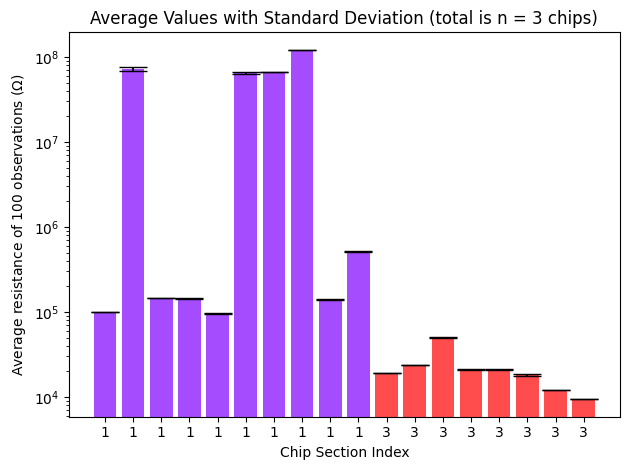

In [56]:
avg_with_stdev_for_each_channel()

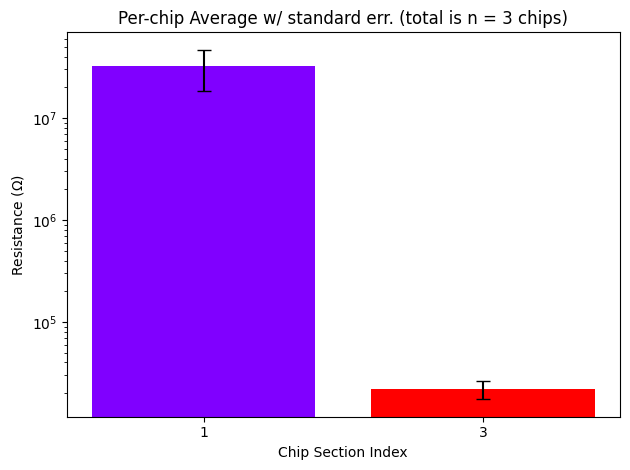

In [57]:
avg_section()

Found 1 outliers in chip-section 3!


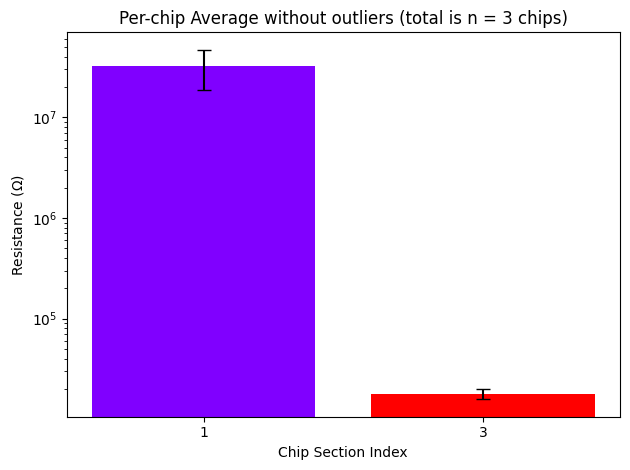

In [58]:
df_without_outliers = df.groupby('chip_id')['R_avg [Ohm]'].apply(_Utility.remove_outliers, dataset_name='chip-section').reset_index()
avg_section_no_outliers()